In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

oil_df = pd.read_csv('U.S._Domestic_Crude_Oil.csv')
gdp_df = pd.read_csv('Gross_Domestic_Product.csv',index_col=0)
gdp_percentage_df = pd.read_csv('Gross_Domestic_Product_Percentage.csv',index_col=0)
ev_sales = pd.read_csv('EV_Sales_US_2011-2019.csv')


# Reaname Oil Data Frame Columns
oil_df.rename(columns={"U.S. Domestic Crude Oil First Purchase Prices Monthly": "Month_year", "Unnamed: 1" : "Avg_Price_per_Barrel"}, inplace=True)

# Print Oil_DF
oil_df = oil_df[1:]
oil_df


,Month_year,Avg_Price_per_Barrel
1,20-Jan,62.86
2,19-Dec,64.01
3,19-Nov,61.69
4,19-Oct,59.3
5,19-Sep,60.34
...,...,...
312,Feb-94,9.39
313,Jan-94,8.51
314,Dec-93,8.49
315,Nov-93,10.69


In [14]:
# Combine months in every year to get an average for that Year

yearly_oil_df = oil_df['Month_year'].str.split("-")

clean = [Year[0] for Year in yearly_oil_df[0:229]]
clean2 = [Year[1] for Year in yearly_oil_df[229:]]
clean.extend(clean2)

oil_df.rename(columns={'Month_year': 'Year'}, inplace=True)

oil_df['Year'] = clean
oil_df

,Year,Avg_Price_per_Barrel
1,20,62.86
2,19,64.01
3,19,61.69
4,19,59.3
5,19,60.34
...,...,...
312,94,9.39
313,94,8.51
314,93,8.49
315,93,10.69


In [15]:
oil_df["Avg_Price_per_Barrel"] = oil_df["Avg_Price_per_Barrel"].apply(lambda x: float(x))

In [16]:
oil_df["Year"] = oil_df["Year"].apply(lambda x: float(x))


In [17]:
oil_df.groupby('Year').mean()
oil_df = oil_df.groupby('Year').mean()
oil_df

,Avg_Price_per_Barrel
Year,
0.0,24.372500
1.0,19.505000
2.0,20.905833
3.0,25.803333
4.0,33.364167
5.0,45.000833
6.0,54.870833
7.0,62.069167
8.0,87.015833


In [18]:
oil_df.index

Float64Index([ 0.0,  1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0,
              11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 93.0,
              94.0, 95.0, 96.0, 97.0, 98.0, 99.0],
             dtype='float64', name='Year')

In [19]:
oil_df.reset_index(inplace=True)

In [20]:
oil_df

,Year,Avg_Price_per_Barrel
0,0.0,24.372500
1,1.0,19.505000
2,2.0,20.905833
3,3.0,25.803333
4,4.0,33.364167
5,5.0,45.000833
6,6.0,54.870833
7,7.0,62.069167
8,8.0,87.015833
9,9.0,53.819167


In [21]:
for _, row in oil_df.iterrows():
    if row['Year'] <= 9:
        row['Year'] = f"{200}{row['Year']}"
    elif row['Year'] < 21:
        row['Year'] = f"{20}{row['Year']}"
    else:
        row['Year'] = f"{19}{row['Year']}"

In [22]:
oil_df

,Year,Avg_Price_per_Barrel
0,2000.0,24.372500
1,2001.0,19.505000
2,2002.0,20.905833
3,2003.0,25.803333
4,2004.0,33.364167
5,2005.0,45.000833
6,2006.0,54.870833
7,2007.0,62.069167
8,2008.0,87.015833
9,2009.0,53.819167


In [23]:


oil_df = oil_df.round(decimals=0).astype(object)
oil_df

,Year,Avg_Price_per_Barrel
0,2000,24
1,2001,20
2,2002,21
3,2003,26
4,2004,33
5,2005,45
6,2006,55
7,2007,62
8,2008,87
9,2009,54


In [24]:
final_oil_df = oil_df.sort_values('Year')
final_oil_df

,Year,Avg_Price_per_Barrel
21,1993,10
22,1994,12
23,1995,13
24,1996,16
25,1997,15
26,1998,9
27,1999,14
0,2000,24
1,2001,20
2,2002,21


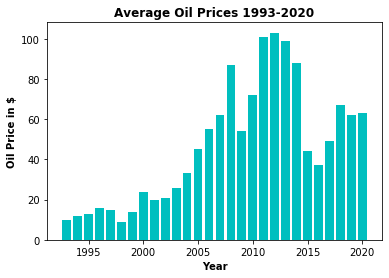

<Figure size 432x288 with 0 Axes>

In [25]:
plt.bar(final_oil_df.Year, final_oil_df.Avg_Price_per_Barrel, color='c')
plt.xlabel("Year",fontweight="bold")
plt.ylabel("Oil Price in $",fontweight="bold")
plt.title("Average Oil Prices 1993-2020", fontweight="bold")
plt.show()
plt.savefig('Oil_price.png')

In [26]:
gdp_df

,Unnamed: 1,Unnamed: 2,1929,1930,1931,1932,1933,1934,1935,1936,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Line,,,,,,,,,,,,,,,,,,,,,
1,Gross domestic product,A191RC,"104,556","92,160","77,391","59,522","57,154","66,800","74,241","84,830",...,"14,992,052","15,542,582","16,197,007","16,784,851","17,527,258","18,224,780","18,715,040","19,519,424","20,580,223","21,427,690"
2,Personal consumption expenditures,DPCERC,"77,382","70,136","60,672","48,714","45,945","51,461","55,932","62,188",...,"10,185,836","10,641,109","11,006,814","11,317,210","11,822,753","12,284,281","12,748,483","13,312,060","13,998,666","14,562,662"
3,Goods,DGDSRC,"43,770","38,164","31,709","24,127","23,756","28,483","31,628","35,969",...,"3,317,825","3,518,121","3,637,739","3,729,973","3,862,956","3,920,335","3,995,905","4,165,019","4,364,783","4,504,964"
4,Durable goods,DDURRC,"9,829","7,661","5,911","3,959","3,762","4,564","5,493","6,749",...,"1,048,962","1,093,499","1,144,221","1,189,413","1,242,075","1,305,897","1,352,645","1,412,570","1,475,585","1,526,830"
5,Nondurable goods,DNDGRC,"33,941","30,503","25,798","20,169","19,994","23,919","26,135","29,221",...,"2,268,862","2,424,622","2,493,518","2,540,559","2,620,881","2,614,438","2,643,260","2,752,450","2,889,199","2,978,133"
6,Services,DSERRC,"33,613","31,972","28,963","24,587","22,189","22,978","24,305","26,218",...,"6,868,011","7,122,988","7,369,075","7,587,238","7,959,797","8,363,946","8,752,578","9,147,041","9,633,883","10,057,698"
7,Gross private domestic investment,A006RC,"17,170","11,428","6,549","1,819","2,276","4,296","7,370","9,391",...,"2,165,473","2,332,562","2,621,754","2,826,013","3,044,178","3,223,077","3,178,709","3,370,687","3,628,305","3,743,929"
8,Fixed investment,A007RC,"15,630","11,651","7,661","4,169","3,680","4,876","6,230","8,230",...,"2,111,555","2,286,300","2,550,542","2,721,483","2,960,212","3,091,207","3,151,639","3,340,497","3,573,581","3,675,636"
9,Nonresidential,A008RC,"11,560","9,184","5,762","3,294","2,955","3,833","4,829","6,403",...,"1,734,981","1,907,465","2,118,527","2,211,494","2,400,057","2,457,411","2,453,145","2,584,749","2,786,922","2,878,117"


In [27]:
gdp_df = gdp_df.drop(gdp_df.columns[1:66], axis =1)
gdp_df

,Unnamed: 1,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Line,,,,,,,,,,,,,,,,,,,,,
1,Gross domestic product,"6,858,559","7,287,236","7,639,749","8,073,122","8,577,552","9,062,817","9,630,663","10,252,347","10,581,822",...,"14,992,052","15,542,582","16,197,007","16,784,851","17,527,258","18,224,780","18,715,040","19,519,424","20,580,223","21,427,690"
2,Personal consumption expenditures,"4,451,984","4,720,965","4,962,590","5,244,596","5,536,790","5,877,248","6,279,078","6,762,144","7,065,634",...,"10,185,836","10,641,109","11,006,814","11,317,210","11,822,753","12,284,281","12,748,483","13,312,060","13,998,666","14,562,662"
3,Goods,"1,642,347","1,746,554","1,815,533","1,917,671","2,006,506","2,108,439","2,287,062","2,453,172","2,525,593",...,"3,317,825","3,518,121","3,637,739","3,729,973","3,862,956","3,920,335","3,995,905","4,165,019","4,364,783","4,504,964"
4,Durable goods,"551,532","607,171","635,738","676,295","715,530","779,293","855,568","912,572","941,515",...,"1,048,962","1,093,499","1,144,221","1,189,413","1,242,075","1,305,897","1,352,645","1,412,570","1,475,585","1,526,830"
5,Nondurable goods,"1,090,814","1,139,382","1,179,795","1,241,376","1,290,976","1,329,146","1,431,493","1,540,600","1,584,078",...,"2,268,862","2,424,622","2,493,518","2,540,559","2,620,881","2,614,438","2,643,260","2,752,450","2,889,199","2,978,133"
6,Services,"2,809,637","2,974,411","3,147,057","3,326,925","3,530,285","3,768,809","3,992,017","4,308,972","4,540,041",...,"6,868,011","7,122,988","7,369,075","7,587,238","7,959,797","8,363,946","8,752,578","9,147,041","9,633,883","10,057,698"
7,Gross private domestic investment,"1,106,826","1,256,484","1,317,489","1,432,055","1,595,600","1,736,671","1,887,059","2,038,408","1,934,842",...,"2,165,473","2,332,562","2,621,754","2,826,013","3,044,178","3,223,077","3,178,709","3,370,687","3,628,305","3,743,929"
8,Fixed investment,"1,086,012","1,192,700","1,286,316","1,401,255","1,524,674","1,672,952","1,826,243","1,983,864","1,973,126",...,"2,111,555","2,286,300","2,550,542","2,721,483","2,960,212","3,091,207","3,151,639","3,340,497","3,573,581","3,675,636"
9,Nonresidential,"799,204","868,853","962,247","1,043,194","1,149,088","1,254,144","1,364,477","1,498,432","1,460,067",...,"1,734,981","1,907,465","2,118,527","2,211,494","2,400,057","2,457,411","2,453,145","2,584,749","2,786,922","2,878,117"


In [28]:
gdp_df.columns

Index(['Unnamed: 1', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019'],
      dtype='object')

In [29]:
gdp_df = gdp_df.drop(gdp_df.index[1:26])
gdp_df

,Unnamed: 1,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Line,,,,,,,,,,,,,,,,,,,,,
1,Gross domestic product,"6,858,559","7,287,236","7,639,749","8,073,122","8,577,552","9,062,817","9,630,663","10,252,347","10,581,822",...,"14,992,052","15,542,582","16,197,007","16,784,851","17,527,258","18,224,780","18,715,040","19,519,424","20,580,223","21,427,690"


In [30]:
gdp_df = gdp_df.transpose()
gdp_df

Line,1
Unnamed: 1,Gross domestic product
1993,"6,858,559"
1994,"7,287,236"
1995,"7,639,749"
1996,"8,073,122"
1997,"8,577,552"
1998,"9,062,817"
1999,"9,630,663"
2000,"10,252,347"
2001,"10,581,822"


In [31]:
gdp_df.reset_index(inplace=True)

In [32]:
gdp_df

Line,index,1
0,Unnamed: 1,Gross domestic product
1,1993,"6,858,559"
2,1994,"7,287,236"
3,1995,"7,639,749"
4,1996,"8,073,122"
5,1997,"8,577,552"
6,1998,"9,062,817"
7,1999,"9,630,663"
8,2000,"10,252,347"
9,2001,"10,581,822"


In [33]:
gdp_df = gdp_df.drop(gdp_df.index[0])

gdp_df

Line,index,1
1,1993,"6,858,559"
2,1994,"7,287,236"
3,1995,"7,639,749"
4,1996,"8,073,122"
5,1997,"8,577,552"
6,1998,"9,062,817"
7,1999,"9,630,663"
8,2000,"10,252,347"
9,2001,"10,581,822"
10,2002,"10,936,418"


In [34]:
gdp_df.rename(columns={"index": "Year", 1: "Gross_Domestic_Product"}, inplace=True)




In [35]:
gdp_df

Line,Year,Gross_Domestic_Product
1,1993,"6,858,559"
2,1994,"7,287,236"
3,1995,"7,639,749"
4,1996,"8,073,122"
5,1997,"8,577,552"
6,1998,"9,062,817"
7,1999,"9,630,663"
8,2000,"10,252,347"
9,2001,"10,581,822"
10,2002,"10,936,418"


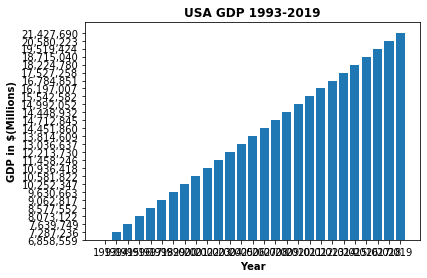

<Figure size 1440x1080 with 0 Axes>

In [36]:
# Plot Bar Chart to show GDP growth

plt.bar(gdp_df.Year, gdp_df.Gross_Domestic_Product)
plt.xlabel("Year",fontweight="bold")
plt.ylabel("GDP in $(Millions)",fontweight="bold")
plt.title("USA GDP 1993-2019",fontweight="bold")
plt.rcParams["figure.figsize"]=20,15
plt.show()
plt.savefig('Gross Domestic Product.png')

In [37]:
final_oil_df["Year"] = final_oil_df["Year"].astype(int)
gdp_df["Year"] = gdp_df["Year"].astype(int)
merged_df = final_oil_df.merge(gdp_df, on="Year")
merged_df

,Year,Avg_Price_per_Barrel,Gross_Domestic_Product
0,1993,10,"6,858,559"
1,1994,12,"7,287,236"
2,1995,13,"7,639,749"
3,1996,16,"8,073,122"
4,1997,15,"8,577,552"
5,1998,9,"9,062,817"
6,1999,14,"9,630,663"
7,2000,24,"10,252,347"
8,2001,20,"10,581,822"
9,2002,21,"10,936,418"


In [38]:
gdp_percentage_df

,Unnamed: 1,Unnamed: 2,1930,1931,1932,1933,1934,1935,1936,1937,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Line,,,,,,,,,,,,,,,,,,,,,
1.0,Gross domestic product,A191RL,-8.5,-6.4,-12.9,-1.2,10.8,8.9,12.9,5.1,...,2.6,1.6,2.2,1.8,2.5,2.9,1.6,2.4,2.9,2.3
2.0,Personal consumption expenditures,DPCERL,-5.4,-3.1,-9,-2.2,7.1,6.1,10.2,3.7,...,1.7,1.9,1.5,1.5,3,3.7,2.7,2.6,3,2.6
3.0,Goods,DGDSRL,-7.9,-3.6,-11.7,-0.7,9.1,8.1,13.3,3,...,2.8,2.2,2.1,3.1,4.1,4.7,3.6,3.9,4.1,3.7
4.0,Durable goods,DDURRL,-17.2,-13.6,-24,-2.6,14.4,21,22.2,5.2,...,5.6,5.1,6,6.1,7.2,7.5,6.1,6.9,6.3,4.8
5.0,Nondurable goods,DNDGRL,-5.2,-1.1,-8.8,-0.4,8.2,5.7,11.4,2.5,...,1.6,0.9,0.4,1.8,2.6,3.4,2.4,2.5,3,3.2
6.0,Services,DSERRL,-2.1,-2.5,-6,-3.7,4.9,3.5,6.1,4.7,...,1.2,1.7,1.2,0.6,2.4,3.2,2.3,2,2.5,2.1
7.0,Gross private domestic investment,A006RL,-31.9,-35,-63.1,35.2,65.4,74.1,26.4,23.2,...,14.1,6.6,11,6.9,5.6,4.9,-1.3,4.4,5.1,1.8
8.0,Fixed investment,A007RL,-22.3,-28.9,-38.4,-9.7,26.5,27,30.6,16,...,3.1,7.1,10,5.6,6.6,3.4,1.9,4.2,4.6,1.3
9.0,Nonresidential,A008RL,-16.7,-32.6,-36.9,-8,25.6,24.6,32.4,18.4,...,4.5,8.7,9.5,4.1,7.2,1.8,0.7,4.4,6.4,2.1


In [39]:
gdp_percentage_df = gdp_percentage_df[gdp_percentage_df.index.notnull()]
gdp_percentage_df

,Unnamed: 1,Unnamed: 2,1930,1931,1932,1933,1934,1935,1936,1937,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Line,,,,,,,,,,,,,,,,,,,,,
1.0,Gross domestic product,A191RL,-8.5,-6.4,-12.9,-1.2,10.8,8.9,12.9,5.1,...,2.6,1.6,2.2,1.8,2.5,2.9,1.6,2.4,2.9,2.3
2.0,Personal consumption expenditures,DPCERL,-5.4,-3.1,-9,-2.2,7.1,6.1,10.2,3.7,...,1.7,1.9,1.5,1.5,3,3.7,2.7,2.6,3,2.6
3.0,Goods,DGDSRL,-7.9,-3.6,-11.7,-0.7,9.1,8.1,13.3,3,...,2.8,2.2,2.1,3.1,4.1,4.7,3.6,3.9,4.1,3.7
4.0,Durable goods,DDURRL,-17.2,-13.6,-24,-2.6,14.4,21,22.2,5.2,...,5.6,5.1,6,6.1,7.2,7.5,6.1,6.9,6.3,4.8
5.0,Nondurable goods,DNDGRL,-5.2,-1.1,-8.8,-0.4,8.2,5.7,11.4,2.5,...,1.6,0.9,0.4,1.8,2.6,3.4,2.4,2.5,3,3.2
6.0,Services,DSERRL,-2.1,-2.5,-6,-3.7,4.9,3.5,6.1,4.7,...,1.2,1.7,1.2,0.6,2.4,3.2,2.3,2,2.5,2.1
7.0,Gross private domestic investment,A006RL,-31.9,-35,-63.1,35.2,65.4,74.1,26.4,23.2,...,14.1,6.6,11,6.9,5.6,4.9,-1.3,4.4,5.1,1.8
8.0,Fixed investment,A007RL,-22.3,-28.9,-38.4,-9.7,26.5,27,30.6,16,...,3.1,7.1,10,5.6,6.6,3.4,1.9,4.2,4.6,1.3
9.0,Nonresidential,A008RL,-16.7,-32.6,-36.9,-8,25.6,24.6,32.4,18.4,...,4.5,8.7,9.5,4.1,7.2,1.8,0.7,4.4,6.4,2.1


In [40]:
gdp_percentage_df = gdp_percentage_df.drop(gdp_percentage_df.columns[1:65], axis =1)
gdp_percentage_df

,Unnamed: 1,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Line,,,,,,,,,,,,,,,,,,,,,
1.0,Gross domestic product,2.8,4,2.7,3.8,4.4,4.5,4.8,4.1,1,...,2.6,1.6,2.2,1.8,2.5,2.9,1.6,2.4,2.9,2.3
2.0,Personal consumption expenditures,3.5,3.9,2.9,3.5,3.8,5.3,5.3,5.1,2.5,...,1.7,1.9,1.5,1.5,3,3.7,2.7,2.6,3,2.6
3.0,Goods,4.2,5.3,3,4.5,4.8,6.7,7.9,5.2,3,...,2.8,2.2,2.1,3.1,4.1,4.7,3.6,3.9,4.1,3.7
4.0,Durable goods,7.5,8,3.9,7.5,8.2,12.1,12.8,8.6,5.2,...,5.6,5.1,6,6.1,7.2,7.5,6.1,6.9,6.3,4.8
5.0,Nondurable goods,2.5,3.9,2.5,2.9,2.9,3.7,5.1,3.2,1.7,...,1.6,0.9,0.4,1.8,2.6,3.4,2.4,2.5,3,3.2
6.0,Services,3.1,3.1,2.9,2.9,3.2,4.5,3.8,5,2.2,...,1.2,1.7,1.2,0.6,2.4,3.2,2.3,2,2.5,2.1
7.0,Gross private domestic investment,8,11.8,3.2,8.7,11.4,9.5,8.5,6.7,-5.6,...,14.1,6.6,11,6.9,5.6,4.9,-1.3,4.4,5.1,1.8
8.0,Fixed investment,7.7,8.2,6.1,8.8,8.6,10.3,9,7.1,-1.4,...,3.1,7.1,10,5.6,6.6,3.4,1.9,4.2,4.6,1.3
9.0,Nonresidential,7.5,7.9,9.7,9.1,10.8,10.9,9.9,9.3,-2.2,...,4.5,8.7,9.5,4.1,7.2,1.8,0.7,4.4,6.4,2.1


In [41]:
gdp_percentage_df = gdp_percentage_df.drop(gdp_percentage_df.index[1:27])
gdp_percentage_df

,Unnamed: 1,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Line,,,,,,,,,,,,,,,,,,,,,
1.0,Gross domestic product,2.8,4,2.7,3.8,4.4,4.5,4.8,4.1,1,...,2.6,1.6,2.2,1.8,2.5,2.9,1.6,2.4,2.9,2.3


In [42]:
gdp_percentage_df = gdp_percentage_df.transpose()
gdp_percentage_df

Line,1.0
Unnamed: 1,Gross domestic product
1993,2.8
1994,4
1995,2.7
1996,3.8
1997,4.4
1998,4.5
1999,4.8
2000,4.1
2001,1


In [43]:
gdp_percentage_df.reset_index(inplace=True)


In [44]:
gdp_percentage_df

Line,index,1.0
0,Unnamed: 1,Gross domestic product
1,1993,2.8
2,1994,4
3,1995,2.7
4,1996,3.8
5,1997,4.4
6,1998,4.5
7,1999,4.8
8,2000,4.1
9,2001,1


In [45]:
gdp_percentage_df = gdp_percentage_df.drop(gdp_percentage_df.index[0])

gdp_percentage_df

Line,index,1.0
1,1993,2.8
2,1994,4
3,1995,2.7
4,1996,3.8
5,1997,4.4
6,1998,4.5
7,1999,4.8
8,2000,4.1
9,2001,1
10,2002,1.7


In [46]:
gdp_percentage_df.rename(columns={"index": "Year", 1: "GDP_Percentage"}, inplace=True)

In [47]:
gdp_percentage_df

Line,Year,GDP_Percentage
1,1993,2.8
2,1994,4
3,1995,2.7
4,1996,3.8
5,1997,4.4
6,1998,4.5
7,1999,4.8
8,2000,4.1
9,2001,1
10,2002,1.7


In [48]:
gdp_percentage_df["GDP_Percentage"] = gdp_percentage_df["GDP_Percentage"].astype(float)

In [49]:
final_oil_df["Year"] = final_oil_df["Year"].astype(int)
gdp_percentage_df["Year"] = gdp_percentage_df["Year"].astype(int)
final_merged_df = final_oil_df.merge(gdp_percentage_df, on="Year")
final_merged_df

,Year,Avg_Price_per_Barrel,GDP_Percentage
0,1993,10,2.8
1,1994,12,4.0
2,1995,13,2.7
3,1996,16,3.8
4,1997,15,4.4
5,1998,9,4.5
6,1999,14,4.8
7,2000,24,4.1
8,2001,20,1.0
9,2002,21,1.7


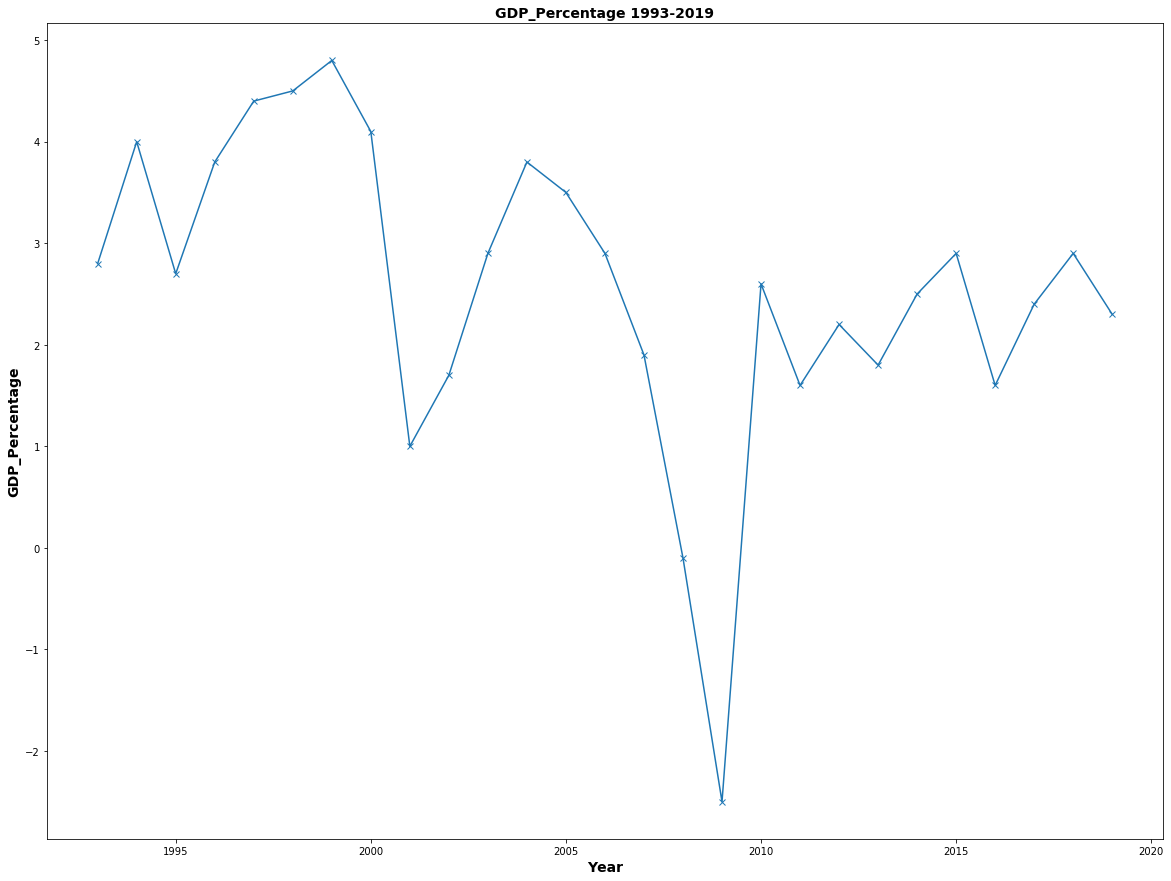

<Figure size 1440x1080 with 0 Axes>

In [50]:
plt.plot(gdp_percentage_df.Year, gdp_percentage_df.GDP_Percentage, marker="x")
plt.xlabel("Year", fontweight="bold",fontsize=14)
plt.ylabel("GDP_Percentage", fontweight="bold", fontsize=14)
plt.title("GDP_Percentage 1993-2019", fontweight="bold",fontsize=14)
plt.show()
plt.savefig('GDP_Percentage 1993-2019.png')



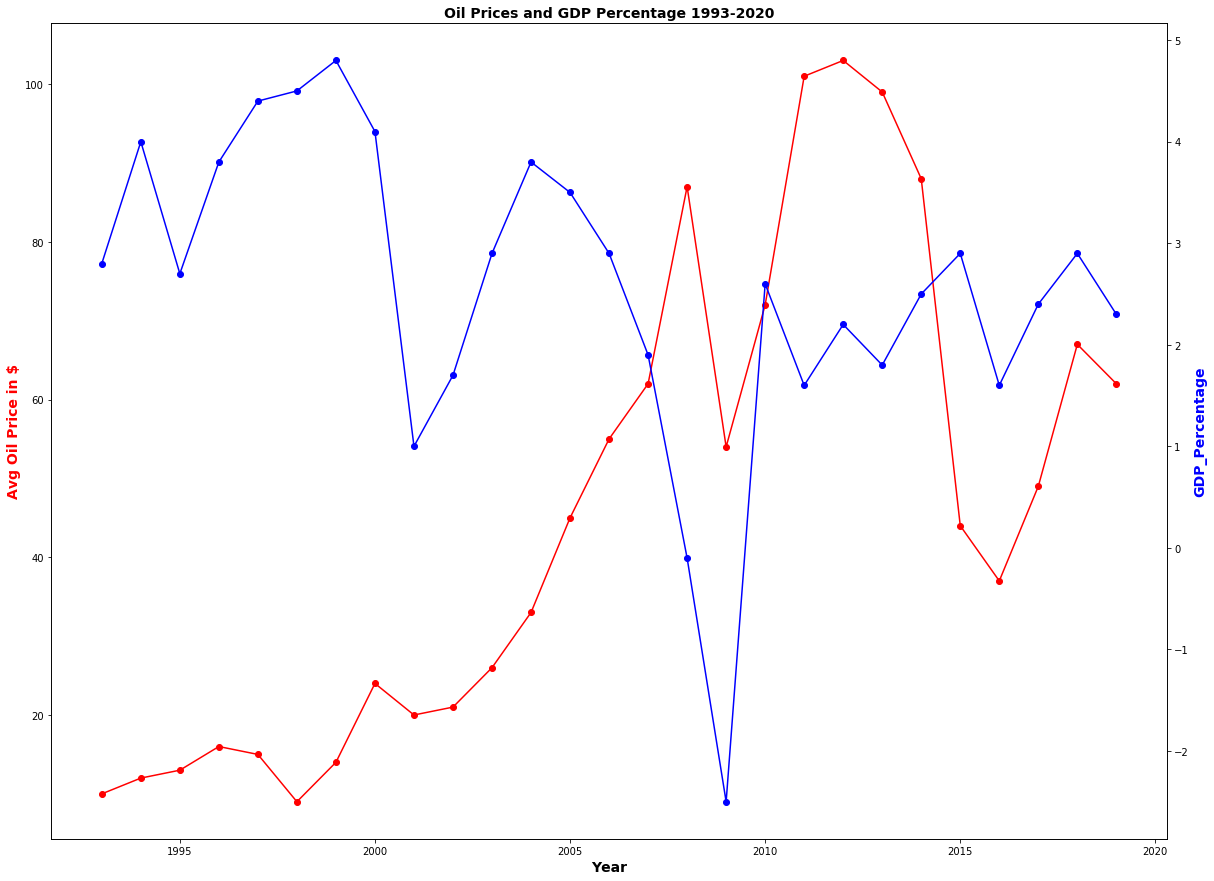

<Figure size 1440x1080 with 0 Axes>

In [51]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(final_merged_df.Year, final_merged_df.Avg_Price_per_Barrel,color="red",marker="o")
# set x-axis label
ax.set_xlabel("Year",fontsize=14, fontweight="bold")
# set y-axis label
ax.set_ylabel("Avg Oil Price in $",color="red",fontsize=14, fontweight="bold")


# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object

ax2.plot(final_merged_df.Year, final_merged_df["GDP_Percentage"],color="blue",marker="o")
ax2.set_ylabel("GDP_Percentage",color="blue",fontsize=14, fontweight="bold")
plt.title("Oil Prices and GDP Percentage 1993-2020",fontsize=14, fontweight="bold")
plt.show()
plt.savefig('Oil and GDP Percentage.png')



In [52]:
ev_sales = ev_sales.dropna(thresh=2)
ev_sales

,Vehicle,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,Chevy Volt,PHEV,"7,671","23,461","23,094","18,805","15,393","24,739","20,349","18,306","4,915","156,733"
1,Nissan Leaf,EV,"9,674","9,819","22,610","30,200","17,269","14,006","11,230","14,715","12,365","141,888"
2,Smart ED,EV,342,139,923,"2,594","1,387",657,544,"1,219",680,"8,485"
3,Mitsubishi I EV,EV,76,588,"1,029",196,115,94,6,-,-,"2,104"
4,BMW Active E,EV,-,673,-,-,-,-,-,-,-,673
5,Prius PHEV,PHEV,-,"12,749","12,088","13,264","4,191","2,474","20,936","27,595","23,630","116,927"
6,Ford Focus EV,EV,-,683,"1,738","1,964","1,582",901,"1,817",560,-,"9,245"
7,Honda Fit EV,EV,-,93,569,407,2,-,-,-,-,"1,071"
8,Tesla Model S,EV,-,"2,400","19,400","16,750","26,200","30,200","26,500","25,745","15,090","162,285"
9,Toyota RAV4 EV,EV,-,192,"1,005","1,184",18,-,-,-,-,"2,399"


In [53]:
ev_sales = ev_sales.drop(ev_sales.columns[1], axis =1)
ev_sales

,Vehicle,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,Chevy Volt,"7,671","23,461","23,094","18,805","15,393","24,739","20,349","18,306","4,915","156,733"
1,Nissan Leaf,"9,674","9,819","22,610","30,200","17,269","14,006","11,230","14,715","12,365","141,888"
2,Smart ED,342,139,923,"2,594","1,387",657,544,"1,219",680,"8,485"
3,Mitsubishi I EV,76,588,"1,029",196,115,94,6,-,-,"2,104"
4,BMW Active E,-,673,-,-,-,-,-,-,-,673
5,Prius PHEV,-,"12,749","12,088","13,264","4,191","2,474","20,936","27,595","23,630","116,927"
6,Ford Focus EV,-,683,"1,738","1,964","1,582",901,"1,817",560,-,"9,245"
7,Honda Fit EV,-,93,569,407,2,-,-,-,-,"1,071"
8,Tesla Model S,-,"2,400","19,400","16,750","26,200","30,200","26,500","25,745","15,090","162,285"
9,Toyota RAV4 EV,-,192,"1,005","1,184",18,-,-,-,-,"2,399"


In [54]:
ev_sales = ev_sales.drop(ev_sales.index[0:55])
ev_sales

,Vehicle,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
55,Total,"17,763","53,171","97,102","118,882","114,023","159,616","195,581","361,315","326,644","1,444,097"


In [55]:
ev_sales = ev_sales.transpose()
ev_sales

,55
Vehicle,Total
2011,"17,763"
2012,"53,171"
2013,"97,102"
2014,"118,882"
2015,"114,023"
2016,"159,616"
2017,"195,581"
2018,"361,315"
2019,"326,644"


In [56]:
ev_sales.reset_index(inplace=True)

In [57]:
ev_sales

,index,55
0,Vehicle,Total
1,2011,"17,763"
2,2012,"53,171"
3,2013,"97,102"
4,2014,"118,882"
5,2015,"114,023"
6,2016,"159,616"
7,2017,"195,581"
8,2018,"361,315"
9,2019,"326,644"


In [58]:
ev_sales.rename(columns={"index": "Year", 55: "Vehicles_Sold_US"}, inplace=True)

In [59]:
ev_sales

,Year,Vehicles_Sold_US
0,Vehicle,Total
1,2011,"17,763"
2,2012,"53,171"
3,2013,"97,102"
4,2014,"118,882"
5,2015,"114,023"
6,2016,"159,616"
7,2017,"195,581"
8,2018,"361,315"
9,2019,"326,644"


In [60]:
ev_sales = ev_sales.drop(ev_sales.index[0])

In [61]:
ev_sales

,Year,Vehicles_Sold_US
1,2011,"17,763"
2,2012,"53,171"
3,2013,"97,102"
4,2014,"118,882"
5,2015,"114,023"
6,2016,"159,616"
7,2017,"195,581"
8,2018,"361,315"
9,2019,"326,644"
10,Total,"1,444,097"


In [62]:
ev_sales = ev_sales.drop(ev_sales.index[9])

In [63]:
ev_sales

,Year,Vehicles_Sold_US
1,2011,"17,763"
2,2012,"53,171"
3,2013,"97,102"
4,2014,"118,882"
5,2015,"114,023"
6,2016,"159,616"
7,2017,"195,581"
8,2018,"361,315"
9,2019,"326,644"


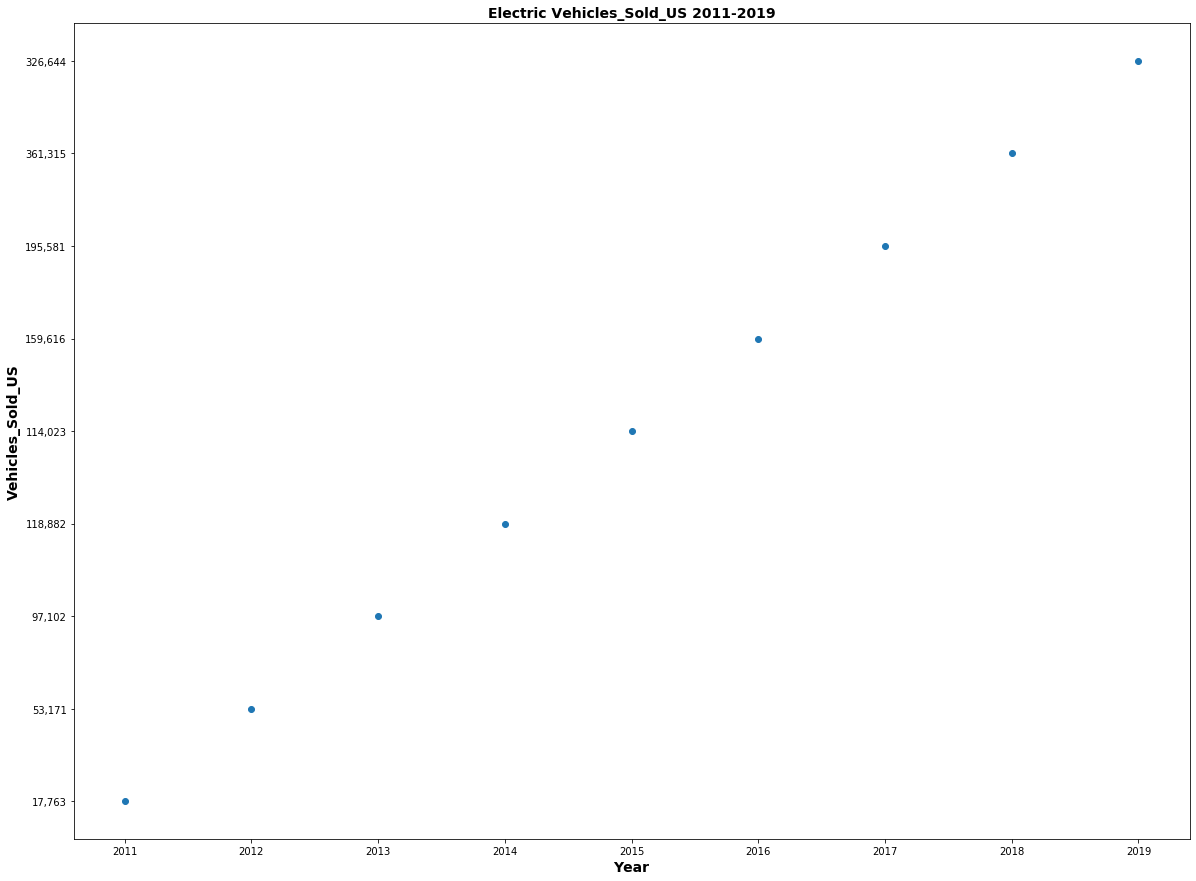

<Figure size 1440x1080 with 0 Axes>

In [64]:
# Plot Scatter 
plt.scatter(ev_sales.Year, ev_sales.Vehicles_Sold_US)
plt.xlabel("Year", fontweight="bold", fontsize=14)
plt.ylabel("Vehicles_Sold_US", fontweight="bold", fontsize=14)
plt.title("Electric Vehicles_Sold_US 2011-2019", fontweight="bold", fontsize=14)
plt.show()
plt.savefig('EV sold in US 2011-2019.png')